In [31]:
import sys
import pandas as pd
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.colors as mcolors
#from wordcloud import WordCloud
# import seaborn as sns
from collections import Counter, defaultdict
# from platform import python_version
from functools import reduce
import gensim
import copy
#print(sys.version)
#print(sys.executable)

In [32]:
class Grids:
   
    def __init__(self,boundingCoordinates) :
        self.boundingCoordinates = boundingCoordinates


    def createGrid(self):
        
        self.rows = int(np.ceil(self.computeDistance(self.boundingCoordinates[0],self.boundingCoordinates[3])))
        print('1. number of rows is :', self.rows)
        
        # how many columns; distance between bottom left corner and bottom right corner
        self.columns = int(np.ceil(self.computeDistance(self.boundingCoordinates[2],self.boundingCoordinates[1])))
        print('2. number of columns is :',self.columns)
        self.noofGrids = int(self.rows * self.columns)
        print('3. no of grids is :', self.noofGrids)
        self.colMax = int(np.ceil(self.computeDistance(self.boundingCoordinates[2],self.boundingCoordinates[1])))
        print('4. no of maxium columns is:', self.colMax)
        
        #self.row_col_point = np.zeros((self.rows,self.columns))
        self.rowPoints = []
        self.colPoints = []
        
        self.lonOffset = (self.boundingCoordinates[2] - self.boundingCoordinates[0])/self.columns
        self.latOffset = (self.boundingCoordinates[3] - self.boundingCoordinates[1])/self.rows
        print(self.latOffset,'lat -- long ',self.lonOffset)
        for i in range(self.rows):
            self.rowPoints.append(51.261318 + i* self.latOffset)
            
        for j in range(self.columns):
            self.colPoints.append(-0.563+j*self.lonOffset)
       
        #print("colPoints:",self.colPoints)
        #print('rowPoints',self.rowPoints)
       
        return self.rowPoints, self.colPoints
        
        
    def computeDistance(self,long2,lat2):
        R = 6371.0
        lat1 = self.boundingCoordinates[1] # 51.261318 
        long1 = self.boundingCoordinates[0] # -0.563
        #lat2 = self.boundingCoordinates[3] # 51.686031
        #long2 = self.boundingCoordinates[2] # 0.28036
        
        phi1 = lat1 * (math.pi / 180)
        phi2 = lat2 * (math.pi / 180)
        
        # delta Phi
        delta1 = (lat2-lat1) * (math.pi / 180)
        
        # delta Lambda
        delta2 = (long2-long1) * (math.pi / 180)
        
        a = math.sin(delta1/2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta2/2) ** 2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = R*c
        
        print('the distance between points is :',d)
        return d
        
        

In [33]:
# New York
#boundingCoordinates= [-74.255653, 40.495682, -73.689484, 40.917622]
# London
boundingCoordinates = [-0.563, 51.261318, 0.28036, 51.686031]
g = Grids(boundingCoordinates)
rowPoint,colPoint = g.createGrid()
print(len(rowPoint),len(colPoint))

the distance between points is : 47.225930879990145
1. number of rows is : 48
the distance between points is : 58.68267622835378
2. number of columns is : 59
3. no of grids is : 2832
the distance between points is : 58.68267622835378
4. no of maxium columns is: 59
0.008848187499999938 lat -- long  0.014294237288135591
48 59


In [44]:
def tweet_grid(coordinates):
    boundingCoordinates = [-0.563, 51.261318, 0.28036, 51.686031]
    g = Grids(boundingCoordinates)
    rowPoint,colPoint = g.createGrid()
    row_col_point = np.zeros((len(rowPoint),len(colPoint)))
    
    latIndex = 0
    lonIndex = 0
    
    for i in range(len(coordinates)):
    # geo lat data from tweet
        lon = coordinates[i]['coordinates'][0]
        lat = coordinates[i]['coordinates'][1]
    #for geoLat in colPoint:
        for k in range(len(rowPoint)):
            if(lat<=rowPoint[k]):
                latIndex = k-1
                break
                #row_col_point[k]
        for j in range(len(colPoint)):
            # geo data from grids  
            if( lon <= colPoint[j] ):
                lonIndex = j-1
                break

        row_col_point[k-1][j-1] += 1.0
        
    print("row_col_point:",len(row_col_point) )
    return row_col_point



In [45]:
df = pd.read_json("geoLondonJan",lines=True)
coordinates = df['coordinates']
row_col_point = tweet_grid(coordinates)

print(row_col_point)

the distance between points is : 47.225930879990145
1. number of rows is : 48
the distance between points is : 58.68267622835378
2. number of columns is : 59
3. no of grids is : 2832
the distance between points is : 58.68267622835378
4. no of maxium columns is: 59
0.008848187499999938 lat -- long  0.014294237288135591
row_col_point: 48
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


48


<AxesSubplot:>

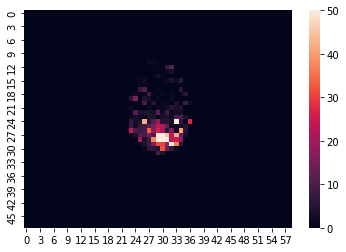

In [57]:
import seaborn as sns
import pandas as pd
import numpy as np

# Create a dataset
heatmapData = row_col_point
print(len(heatmapData))

# Default heatmap
sns.heatmap(data=heatmapData,vmin=0,vmax=50)


In [47]:
histData = []

for i in range(len(row_col_point)):
    for j in range( len(row_col_point[i])):
        histData.append(row_col_point[i][j])
        
print(len(histData))

# histogram = dict(Counter(histData))


2832


(0.0, 50.0)

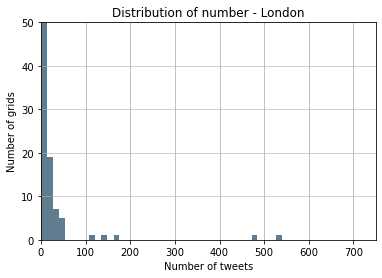

In [48]:
#size, scale = 1000, 10
commutes = pd.Series(histData)

commutes.plot.hist(grid=True, bins=100, rwidth=0.9,color='#607c8e')
plt.title('Distribution of number - London')
plt.xlabel('Number of tweets')
plt.ylabel('Number of grids')
plt.xlim(0,750)
plt.grid(axis='y', alpha=0.75)

plt.ylim(0,50)

In [ ]:
# *********************************  question 2 *************************************************************

# You will be given a set of high-quality tweets and low-quality tweets. 
# Develop newsworthy scoring method based on this dataset.

# *********************************  question 2 *************************************************************

In [87]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

nltk.download('punkt')
from nltk import sent_tokenize

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 
                   'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice',
                   'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 
                   'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/littlesheep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/littlesheep/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:

class newsWorthScore:
    def __init__(self):
        self.dfHigh = pd.read_json("highFileFeb",lines=True)
        self.dfLow = pd.read_json("lowFileFeb",lines=True)
        
        self.getData()
            
    def getData(self):
        self.df_High, self.high_totalCount = self.splitAndCountWord(self.dfHigh)
        self.df_Low, self.low_totalCount = self.splitAndCountWord(self.dfLow)
        self.BG_data = self.merge_dict(self.df_High,self.df_Low)
        self.BG_totalCount = self.high_totalCount+self.low_totalCount
    
        self.R_HHQ_Dict = self.computR(self.df_High, self.high_totalCount)
        self.R_LLQ_Dict = self.computR(self.df_Low, self.low_totalCount)
        
        
        self.R_HinL_dict, self.R_LinH_dict = self.computDiffR(self.df_High,self.high_totalCount,self.df_Low,self.low_totalCount)
        
        return self.R_HHQ_Dict,self.R_HinL_dict,self.R_LLQ_Dict,self.R_LinH_dict

    # Count the number of times each word appears
    def splitAndCountWord(self,rawData):
        
        tweets_content = [tweet for tweet in rawData['text']]
#         print(tweets_content)
        data_words = list(self.sent_to_words(tweets_content))
        data_no_stopwords = reduce(lambda x, y: x + y, data_words)
        ctr = Counter(data_no_stopwords)
#         print(ctr)
        return ctr, len(data_no_stopwords)
    
    
    def sent_to_words(self,sentences):
        for sent in sentences:
            sent = re.sub('\S*@\S*\s?', '', str(sent))  # remove emails
            sent = re.sub('\s+', ' ', sent)  # remove newline chars
            sent = re.sub("http\S*", "", sent)  # remove single quotes
            sent = re.sub("\'", "", sent) 
            sent = re.sub("&\S*", "", sent)
            sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 

#             tokens_without_sw = [word for word in sent if not word in stopwords.words()]
#             print(tokens_without_sw)
            yield(sent) 
            
     # merge dictionary
    def merge_dict(self,x,y):
        z = copy.deepcopy(y)
        for k,v in x.items():
                if k == z.keys():
                     z[k] += v
                else:
                     z[k] = v
        return z
            

    def computR(self,df,dfNum):
        self.R_dict = defaultdict(lambda: 0)
        for key,value in df.items():
            F_Q = value / dfNum
            F_BG = self.BG_data[key] / self.BG_totalCount
            R_Q = F_Q / F_BG
            self.R_dict[key] = R_Q
#         print('R_HQ_dict:',self.R_dict)
        
        return self.R_dict

    def computDiffR(self,df_High,high_totalCount,df_Low,low_totalCount):
        R_HinL_dict =  defaultdict(lambda: 0)
        R_LinH_dict =  defaultdict(lambda: 0)
        # comput HR from L
        # loop highfile
        for high in df_High.keys():
            # if the word is in lowfile
            if high in df_Low.keys():
                F_Q = df_Low[high] / low_totalCount
                F_BG = self.BG_data[high] / self.BG_totalCount
                R_Q = F_Q / F_BG
                R_HinL_dict[high] = R_Q
            
        for low in df_Low.keys():
            if low in df_High.keys():
                F_Q = df_Low[high] / low_totalCount
                F_BG = self.BG_data[high] / self.BG_totalCount
                R_Q = F_Q / F_BG
                R_LinH_dict[low] = R_Q
                
        return R_HinL_dict, R_LinH_dict
    
    def computS(self,R_HQ_dict,R_LQ_dict):
#         print(R_HQ_dict)
        S_HQ_dict = defaultdict(lambda: 0)
        for rhq_key,rhq_value in R_HQ_dict.items():
            if(rhq_value > 1.8):
                S_HQ = rhq_value
            elif(rhq_value < 1.8):
                S_HQ = 0
            S_HQ_dict[rhq_key] =  S_HQ

        S_LQ_dict = defaultdict(lambda: 0)
        for rlq_key,rlq_value in R_LQ_dict.items():
            if(rlq_value > 1.8):
                S_LQ = rlq_value
            elif(rlq_value < 1.8):
                S_LQ = 0
            S_LQ_dict[rlq_key] =  S_LQ

        self.newsScore(S_HQ_dict,S_LQ_dict)
        return S_HQ_dict,S_LQ_dict
        
    def newsScore(self,S_HQ_dict,S_LQ_dict):
        newsWorth_Score = 0
        news_HS = 1
        news_LS = 1
        for key,value in S_HQ_dict.items():
            news_HS += value
              
        for key,value in S_LQ_dict.items():
            news_LS += value     
            
        newsWorth_Score = math.log(news_HS/news_LS, 2)
#         print('newsWorth_Score:',newsWorth_Score) 
        if newsWorth_Score>0:
            return 'success'
        elif newsWorth_Score<0:
            return 'fail'
    

    def tweetScore(self,tweet_Dict,tweetNum):
#         print(tweet)
#         tweet_Dict,tweetNum = self.splitAndCountWord(tweet)
#         print("-----",tweet_Dict)
        self.RHQ_tweet_dict = defaultdict(lambda: 0)
        self.RLQ_tweet_dict = defaultdict(lambda: 0)
        for key in tweet_Dict.keys():
            for rhq_key,rhq_value in self.R_HHQ_Dict.items():
                if key == rhq_key:
                    self.RHQ_tweet_dict[key] = rhq_value

        
            for rlq_key,rlq_value in self.R_LLQ_Dict.items():
                if key == rlq_key:
                    self.RLQ_tweet_dict[key] = rlq_value

#         print(self.RHQ_tweet_dict,self.RLQ_tweet_dict)           
        S_HQ_dict,S_LQ_dict = self.computS(self.RHQ_tweet_dict,self.RLQ_tweet_dict) 
        newsWorth_Score = self.newsScore(S_HQ_dict,S_LQ_dict)
        return newsWorth_Score
        
newsWorthScore = newsWorthScore()

In [13]:
# newsWorthScore = newsWorthScore()
R_HHQ_Dict,R_HLQ_Dict,R_LLQ_Dict,R_LHQ_Dict= newsWorthScore.getData()


In [16]:
# print(R_LLQ_Dict)

In [201]:
# stopWord


data_no_stopword_HH = [word for word in R_HHQ_Dict.keys() if not word in stopwords.words()]
data_no_stopword_HL = [word for word in R_HLQ_Dict.keys() if not word in stopwords.words()]
data_no_stopword_LH = [word for word in R_LHQ_Dict.keys() if not word in stopwords.words()]
data_no_stopword_LL = [word for word in R_LLQ_Dict.keys() if not word in stopwords.words()]


In [145]:
HHQ_no_stopword = dict(Counter(data_no_stopword_HH))
HHQ_no_stopword_num = len(data_no_stopword_HH)
R_HHQ_no_stopword = newsWorthScore.computR(HHQ_no_stopword,HHQ_no_stopword_num)
# print(R_HHQ_no_stopword)
HLQ_no_stopword = dict(Counter(data_no_stopword_HL))
HLQ_no_stopword_num = len(data_no_stopword_HL)
R_HLQ_no_stopword = newsWorthScore.computR(HLQ_no_stopword,HLQ_no_stopword_num)

LHQ_no_stopword = dict(Counter(data_no_stopword_LH))
LHQ_no_stopword_num = len(data_no_stopword_LH)
R_LHQ_no_stopword = newsWorthScore.computR(LHQ_no_stopword,LHQ_no_stopword_num)

LLQ_no_stopword = dict(Counter(data_no_stopword_LL))
LLQ_no_stopword_num = len(data_no_stopword_LL)
R_LLQ_no_stopword = newsWorthScore.computR(LLQ_no_stopword,LLQ_no_stopword_num)

In [165]:
import sys
import numpy as np
 
def statistic_arr(myarr,bins):
    """
     print the data distribution in myarr based on the segment in bins
     Args:
        myarr (np.array):  the data for statistic
        bins (np.array):  the segment of the data, such as[0.5, 1, 5, 10]
    """

    
    statis= np.arange(bins.size)
    result = defaultdict(lambda: 0)
    for i in range(0, bins.size):
        statis[i]= myarr[myarr > bins[i]].size
        
        str_item = ("data>" + str(bins[i]) , str(round(statis[i]/myarr.size,5) ))
#         result.append(str_item)
        result[bins[i]]=round(statis[i]/myarr.size,5)
    
#     print(result)
    return result



In [168]:
bins=np.arange(0, 2.5, 0.001)


In [170]:
R_HHQ=np.array(list(R_HHQ_Dict.values()))
R_HLQ=np.array(list(R_HLQ_Dict.values()))
R_LHQ=np.array(list(R_LHQ_Dict.values()))
R_LLQ=np.array(list(R_LLQ_Dict.values()))

P_HHQ = np.array(list(statistic_arr(R_HHQ,bins).values()))
P_HLQ = np.array(list(statistic_arr(R_HLQ,bins).values()))
P_LHQ = np.array(list(statistic_arr(R_LHQ,bins).values()))
P_LLQ = np.array(list(statistic_arr(R_LLQ,bins).values()))


diff_H =(P_HHQ)-(P_HLQ)

diff_L =P_LLQ-P_LHQ

In [185]:
bins_no=np.arange(0, 10, 0.001)
R_HHQ_no=np.array(list(R_HHQ_no_stopword.values()))
R_HLQ_no=np.array(list(R_HLQ_no_stopword.values()))
R_LHQ_no=np.array(list(R_LHQ_no_stopword.values()))
R_LLQ_no=np.array(list(R_LLQ_no_stopword.values()))


P_HHQ_no = np.array(list(statistic_arr(R_HHQ_no,bins_no).values()))
P_HLQ_no = np.array(list(statistic_arr(R_HLQ_no,bins_no).values()))
P_LHQ_no = np.array(list(statistic_arr(R_LHQ_no,bins_no).values()))
P_LLQ_no = np.array(list(statistic_arr(R_LLQ_no,bins_no).values()))


diff_H_no =(P_HHQ_no)-(P_HLQ_no)

diff_L_no = P_LLQ_no - P_LHQ_no


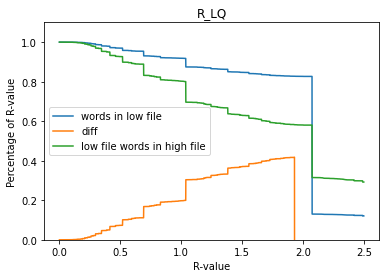

In [172]:
fig, ax = plt.subplots() 

ax.plot(bins, P_LLQ, label='words in low file') 
ax.plot(bins,diff_H,label="diff")
ax.plot(bins, P_HLQ, label='low file words in high file') 
# ax.plot(bins, P_HHQ_no_stopword, label='no stop word')

ax.set_xlabel('R-value')
ax.set_ylabel('Percentage of R-value')
ax.set_title('R_LQ') 
ax.legend() 

plt.ylim(0,1.1)
plt.show() 

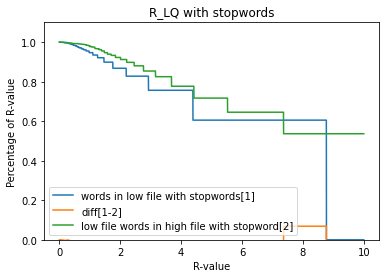

In [190]:
fig, ax = plt.subplots() 

ax.plot(bins_no, P_LLQ_no, label='words in low file with stopwords[1]') 
ax.plot(bins_no,diff_L_no,label="diff[1-2]")
ax.plot(bins_no, P_HLQ_no, label='low file words in high file with stopword[2]') 

ax.set_xlabel('R-value')
ax.set_ylabel('Percentage of R-value')
ax.set_title('R_LQ with stopwords') 
ax.legend() 
plt.ylim(0,1.1)
plt.show() 

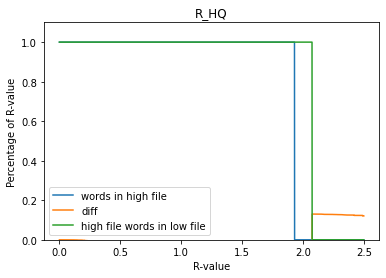

In [152]:
fig, ax = plt.subplots() 

ax.plot(bins, P_HHQ, label='words in high file') 
ax.plot(bins,diff_L,label="diff")
ax.plot(bins, P_LHQ, label='high file words in low file') 

ax.set_xlabel('R-value')
ax.set_ylabel('Percentage of R-value')
ax.set_title('R_HQ') 
ax.legend() 
plt.ylim(0,1.1)
plt.show() 

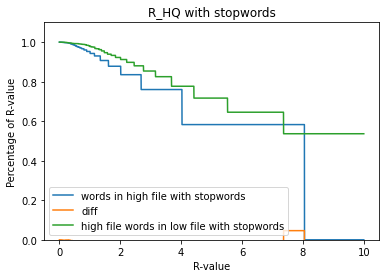

In [191]:
fig, ax = plt.subplots() 

ax.plot(bins_no, P_HHQ_no, label='words in high file with stopwords') 
ax.plot(bins_no,diff_H_no,label="diff")
ax.plot(bins_no, P_LHQ_no, label='high file words in low file with stopwords') 

ax.set_xlabel('R-value')
ax.set_ylabel('Percentage of R-value')
ax.set_title('R_HQ with stopwords') 
ax.legend() 
plt.ylim(0,1.1)
plt.show() 

In [ ]:
# *************************************************  Q3 *********************************************

# *************************************************  Q3 *********************************************

# *************************************************  Q3 *********************************************

In [ ]:
df_geo = pd.read_json("geoLondonJan",lines=True)

In [ ]:
def splitAndCountWord(rawData):
        tweets_content = [tweet for tweet in rawData['text'].split()]
        data_words = list(sent_to_words(tweets_content))
        data_no_stopwords = reduce(lambda x, y: x + y, data_words)
        ctr = Counter(data_no_stopwords)
        return ctr, len(data_no_stopwords)
    
    
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', (sent))  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("http\S*", "", sent)  # remove single quotes
        sent = re.sub("\'", "", sent) 
        sent = re.sub("&\S*", "", sent)
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 

In [76]:
tweet_coordinate=[]
tweet_coordinate_lowScore=[]
tweet_text_high=[]
tweet_text_low=[]
for tweet in df_geo.iloc:
    t_dict, t_wordCount = splitAndCountWord(tweet)
    score = newsWorthScore.tweetScore(t_dict, t_wordCount)

    if score=="success":
        tweet_geo = tweet['coordinates']
        tweet_text_high.append(tweet["text"])
        tweet_coordinate.append(tweet_geo)
        
    if score=="fail":
        tweet_geo = tweet['coordinates']
        tweet_text_low.append(tweet["text"])
        tweet_coordinate_lowScore.append(tweet_geo)
        
      

In [81]:
data_words_high = list(sent_to_words(tweet_text_high))
print(data_words_high)

[['gy', 'the', 'london', 'school', 'of', 'economics', 'and', 'political', 'science', 'lse'], ['magic', 'mirror', 'photo', 'booth', 'hire', 'in', 'kent', 'and', 'south', 'east', 'london', 'magicmirror', 'london', 'united', 'kingdom'], ['im', 'at', 'joe', 'the', 'juice', 'in', 'london', 'greater', 'london'], ['pink', 'to', 'make', 'the', 'boys', 'wink', 'wearing', 'blazer', 'and', 'skirt', 'bodysuit', 'london', 'united', 'kingdom'], ['hello', 'can', 'help', 'you', 'canela', 'cavapoo', 'doglife', 'london', 'united', 'kingdom'], ['brixton', 'road', 'at', 'wynne', 'road'], ['melbourne', 'victory', 'fined', 'for', 'anti', 'gay', 'abuse', 'directed', 'at', 'josh', 'cavallo', 'espn', 'football', 'australia', 'will', 'fine', 'melbourne', 'victory', 'aud', 'for', 'anti', 'gay', 'abuse', 'directed', 'at', 'josh', 'cavallo', 'by', 'during', 'an', 'league', 'match', 'earlier', 'this'], ['support', 'your', 'children', 'if', 'they', 'are', 'gay', 'pope', 'tells', 'parents', 'reuters', 'russia', 'will

In [98]:
filtered_sentence_high = []
for sent in data_words_high:
    filtered_sentence = [w for w in sent if not w in stop_words]
    filtered_sentence_high.append(filtered_sentence)
    
print(filtered_sentence_high)

[['gy', 'london', 'school', 'economics', 'political', 'science', 'lse'], ['magic', 'mirror', 'photo', 'booth', 'hire', 'kent', 'south', 'east', 'london', 'magicmirror', 'london', 'united', 'kingdom'], ['im', 'joe', 'juice', 'london', 'greater', 'london'], ['pink', 'boys', 'wink', 'wearing', 'blazer', 'skirt', 'bodysuit', 'london', 'united', 'kingdom'], ['hello', 'help', 'canela', 'cavapoo', 'doglife', 'london', 'united', 'kingdom'], ['brixton', 'road', 'wynne', 'road'], ['melbourne', 'victory', 'fined', 'anti', 'gay', 'abuse', 'directed', 'josh', 'cavallo', 'espn', 'football', 'australia', 'fine', 'melbourne', 'victory', 'aud', 'anti', 'gay', 'abuse', 'directed', 'josh', 'cavallo', 'league', 'match', 'earlier'], ['support', 'children', 'gay', 'pope', 'tells', 'parents', 'reuters', 'russia', 'face', 'severe', 'economic', 'sanctions', 'installs', 'puppet', 'regime', 'ukraine', 'senior', 'uk', 'minister', 'said', 'sunday', 'britain', 'accused'], ['avid', 'scarves', 'wearer', 'age', 'exper

In [82]:
data_words_low = list(sent_to_words(tweet_text_low))
print(data_words_low)

[['just', 'posted', 'photo', 'london', 'unιted', 'kingdom'], ['how', 'to', 'make', 'sure', 'your', 'covid', 'test', 'isnt', 'fake'], ['throwback', 'to', 'when', 'me', 'and', 'met', 'at', 'legends', 'southampton', 'uk', 'london', 'united', 'kingdom'], ['even', 'when', 'you', 'should', 'have', 'learned', 'bitterness', 'its', 'called', 'that', 'because', 'it', 'tastes', 'like', 'shit', 'wimbledon', 'united', 'kingdom'], ['just', 'posted', 'photo', 'london', 'united', 'kingdom'], ['just', 'posted', 'photo', 'camberwell'], ['just', 'posted', 'photo', 'vaudeville', 'theatre'], ['just', 'posted', 'photo', 'london', 'united', 'kingdom'], ['just', 'posted', 'photo', 'white', 'conduit', 'projects'], ['just', 'posted', 'photo', 'london', 'united', 'kingdom'], ['just', 'posted', 'photo', 'london', 'united', 'kingdom'], ['just', 'posted', 'photo', 'london', 'united', 'kingdom'], ['just', 'posted', 'photo', 'london', 'united', 'kingdom'], ['just', 'posted', 'photo', 'england', 'uk'], ['just', 'poste

In [99]:
filtered_sentence_low = []
for sent in data_words_low:
    filtered_sentence = [w for w in sent if not w in stop_words]
    filtered_sentence_low.append(filtered_sentence)
    
print(filtered_sentence_low)

[['posted', 'photo', 'london', 'unιted', 'kingdom'], ['sure', 'covid', 'test', 'isnt', 'fake'], ['throwback', 'met', 'legends', 'southampton', 'uk', 'london', 'united', 'kingdom'], ['learned', 'bitterness', 'called', 'tastes', 'like', 'shit', 'wimbledon', 'united', 'kingdom'], ['posted', 'photo', 'london', 'united', 'kingdom'], ['posted', 'photo', 'camberwell'], ['posted', 'photo', 'vaudeville', 'theatre'], ['posted', 'photo', 'london', 'united', 'kingdom'], ['posted', 'photo', 'white', 'conduit', 'projects'], ['posted', 'photo', 'london', 'united', 'kingdom'], ['posted', 'photo', 'london', 'united', 'kingdom'], ['posted', 'photo', 'london', 'united', 'kingdom'], ['posted', 'photo', 'london', 'united', 'kingdom'], ['posted', 'photo', 'england', 'uk'], ['posted', 'photo', 'morden', 'hall', 'weddings'], ['isnt', 'beautiful', 'sitting', 'bens', 'arm', 'beauty', 'london', 'united', 'kingdom'], ['posted', 'photo', 'leadenhall', 'market'], ['posted', 'photo', 'london', 'united', 'kingdom'], 

In [ ]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""
 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(word_tokens)
print(filtered_sentence)

the distance between points is : 47.225930879990145
1. number of rows is : 48
the distance between points is : 58.68267622835378
2. number of columns is : 59
3. no of grids is : 2832
the distance between points is : 58.68267622835378
4. no of maxium columns is: 59
0.008848187499999938 lat -- long  0.014294237288135591
row_col_point: 48


<AxesSubplot:>

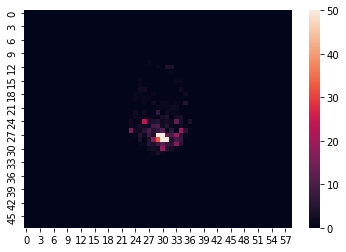

In [71]:
row_col_tweet = tweet_grid(tweet_coordinate)
sns.heatmap(data=row_col_tweet,vmin=0,vmax=50)  

the distance between points is : 47.225930879990145
1. number of rows is : 48
the distance between points is : 58.68267622835378
2. number of columns is : 59
3. no of grids is : 2832
the distance between points is : 58.68267622835378
4. no of maxium columns is: 59
0.008848187499999938 lat -- long  0.014294237288135591
row_col_point: 48


<AxesSubplot:>

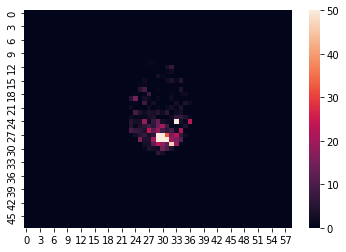

In [83]:
row_col_tweet_lowScore = tweet_grid(tweet_coordinate_lowScore)
sns.heatmap(data=row_col_tweet_lowScore,vmin=0,vmax=50)

(0.0, 30.0)

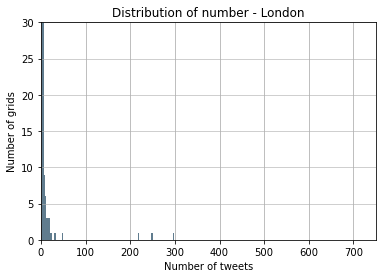

In [84]:
histData_highScore = []

for i in range(len(row_col_tweet)):
    for j in range( len(row_col_tweet[i])):
        histData_highScore.append(row_col_tweet[i][j])
        
commutes = pd.Series(histData_highScore)

commutes.plot.hist(grid=True, bins=100, rwidth=0.9,color='#607c8e')
plt.title('Distribution of number - London')
plt.xlabel('Number of tweets')
plt.ylabel('Number of grids')
plt.xlim(0,750)
plt.grid(axis='y', alpha=0.75)

plt.ylim(0,30)

(0.0, 50.0)

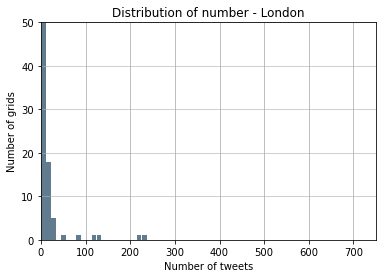

In [85]:
histData_lowScore = []

for i in range(len(row_col_tweet_lowScore)):
    for j in range( len(row_col_tweet_lowScore[i])):
        histData_lowScore.append(row_col_tweet_lowScore[i][j])
        
commutes = pd.Series(histData_lowScore)

commutes.plot.hist(grid=True, bins=100, rwidth=0.9,color='#607c8e')
plt.title('Distribution of number - London')
plt.xlabel('Number of tweets')
plt.ylabel('Number of grids')
plt.xlim(0,750)
plt.grid(axis='y', alpha=0.75)

plt.ylim(0,50)